In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [50]:
import sqlite3
# Connect to the SQLite database
goSales = sqlite3.connect('../go_sales.sqlite')

# Read product table into a DataFrame
product_df = pd.read_sql_query("SELECT PRODUCT_NUMBER, INTRODUCTION_DATE, PRODUCT_TYPE_CODE, PRODUCTION_COST, MARGIN, LANGUAGE, PRODUCT_NAME, DESCRIPTION FROM product", goSales)

# Read order_detail table into a DataFrame
orderDetails_df = pd.read_sql_query("SELECT ORDER_DETAIL_CODE, ORDER_NUMBER, PRODUCT_NUMBER, QUANTITY, UNIT_COST, UNIT_SALE_PRICE FROM order_details", goSales)

# Merge the two DataFrames on 'PRODUCT_NUMBER'
merged_df = pd.merge(orderDetails_df, product_df, on='PRODUCT_NUMBER', how='inner')

# Print the merged DataFrame
merged_df

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_SALE_PRICE,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,LANGUAGE,PRODUCT_NAME,DESCRIPTION
0,100000,8462,96,16,16.1,22.54,15-2-2011,17,16.43,.28,EN,Compact Relief Kit,A personal first aid kit is recommended for ev...
1,100001,9111,96,20,16.1,22.54,15-2-2011,17,16.43,.28,EN,Compact Relief Kit,A personal first aid kit is recommended for ev...
2,100002,8451,96,24,16.1,22.54,15-2-2011,17,16.43,.28,EN,Compact Relief Kit,A personal first aid kit is recommended for ev...
3,100003,8453,96,18,16.1,22.54,15-2-2011,17,16.43,.28,EN,Compact Relief Kit,A personal first aid kit is recommended for ev...
4,100004,8439,96,20,16.1,22.54,15-2-2011,17,16.43,.28,EN,Compact Relief Kit,A personal first aid kit is recommended for ev...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,99995,8459,95,146,2.76,5.55,15-2-2011,16,3,.5,EN,Sun Shield,"PABA free sunscreen, SPF 30, poison oak and iv..."
43059,99996,8457,95,172,2.76,5.55,15-2-2011,16,3,.5,EN,Sun Shield,"PABA free sunscreen, SPF 30, poison oak and iv..."
43060,99997,9267,95,192,2.76,5.55,15-2-2011,16,3,.5,EN,Sun Shield,"PABA free sunscreen, SPF 30, poison oak and iv..."
43061,99998,8441,95,192,2.76,5.55,15-2-2011,16,3,.5,EN,Sun Shield,"PABA free sunscreen, SPF 30, poison oak and iv..."


In [91]:
merged_df = merged_df.loc[:,['QUANTITY', 'UNIT_COST', 'UNIT_SALE_PRICE', 'MARGIN']]
merged_df['QUANTITY'] = merged_df['QUANTITY'].astype(float)
merged_df['UNIT_COST'] = merged_df['UNIT_COST'].astype(float)
merged_df['UNIT_SALE_PRICE'] = merged_df['UNIT_SALE_PRICE'].astype(float)
merged_df['MARGIN'] = merged_df['MARGIN'].astype(float)
merged_df['MARGIN'] = merged_df['UNIT_SALE_PRICE'] / merged_df['UNIT_COST']
merged_df

,QUANTITY,UNIT_COST,UNIT_SALE_PRICE,MARGIN
0,16.0,16.10,22.54,1.40000
1,20.0,16.10,22.54,1.40000
2,24.0,16.10,22.54,1.40000
3,18.0,16.10,22.54,1.40000
4,20.0,16.10,22.54,1.40000
...,...,...,...,...
43058,146.0,2.76,5.55,2.01087
43059,172.0,2.76,5.55,2.01087
43060,192.0,2.76,5.55,2.01087
43061,192.0,2.76,5.55,2.01087


In [92]:
x = merged_df.drop('UNIT_SALE_PRICE', axis=1)
y = merged_df.loc[:, 'UNIT_SALE_PRICE']
x

,QUANTITY,UNIT_COST,MARGIN
0,16.0,16.10,1.40000
1,20.0,16.10,1.40000
2,24.0,16.10,1.40000
3,18.0,16.10,1.40000
4,20.0,16.10,1.40000
...,...,...,...
43058,146.0,2.76,2.01087
43059,172.0,2.76,2.01087
43060,192.0,2.76,2.01087
43061,192.0,2.76,2.01087


In [93]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42
)

In [94]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(x_train, y_train)
reg_model

LinearRegression()

In [95]:
y_pred = reg_model.predict(x_test)
y_pred

array([ 3.84395169e+00,  6.42380488e+01,  5.75242053e+01, ...,
        7.87577629e+02,  6.25669038e-01, -3.87159584e+00])

In [96]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted_Unit_Sale_Price'})
prediction_df

,Predicted_Unit_Sale_Price
0,3.843952
1,64.238049
2,57.524205
3,756.934613
4,87.371682
...,...
6455,38.740528
6456,58.599184
6457,787.577629
6458,0.625669


In [97]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['UNIT_SALE_PRICE'], prediction_df], axis=1)
y_test_prediction_merge.loc[y_test_prediction_merge['Predicted_Unit_Sale_Price'].notna(), :]

,UNIT_SALE_PRICE,Predicted_Unit_Sale_Price
0,22.61,3.843952
1,63.27,64.238049
2,61.84,57.524205
3,526.59,756.934613
4,90.00,87.371682
...,...,...
6455,37.18,38.740528
6456,60.33,58.599184
6457,613.16,787.577629
6458,10.64,0.625669


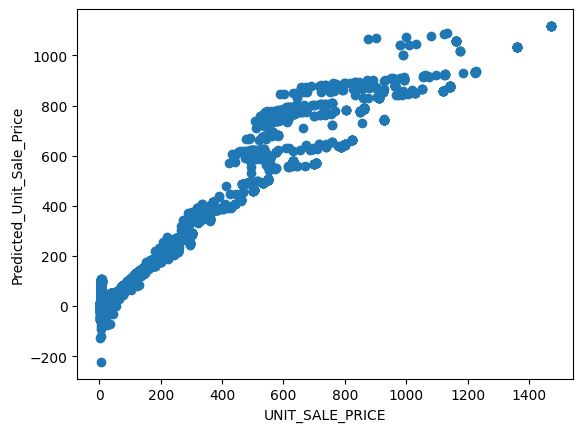

In [104]:
plt.scatter(y_test_prediction_merge['UNIT_SALE_PRICE'], y_test_prediction_merge['Predicted_Unit_Sale_Price'])
plt.xlabel('UNIT_SALE_PRICE')
plt.ylabel('Predicted_Unit_Sale_Price')
plt.show()

In [101]:
mean_squared_error(y_test_prediction_merge['UNIT_SALE_PRICE'], y_test_prediction_merge['Predicted_Unit_Sale_Price'])

2796.175157389565

In [103]:
mean_absolute_error(y_test_prediction_merge['UNIT_SALE_PRICE'], y_test_prediction_merge['Predicted_Unit_Sale_Price'])

27.164867741547326

In [107]:
totalUnitSalePrice = y_test_prediction_merge['UNIT_SALE_PRICE'].sum()
totalUnitSalePrice

984696.15

In [108]:
totalPredictedUnitSalePrice = y_test_prediction_merge['Predicted_Unit_Sale_Price'].sum()
totalPredictedUnitSalePrice

984840.5926110864